In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
raw_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/interim/'
figures_dir = '/home/grace/Documents/python/ttc_inhalation/reports/figures/'


In [3]:
ClassIII_rep_ppm = pd.read_csv(processed_dat_dir+'ClassIII_rep_ppm.csv')
ClassIII_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassIII_rep_mgm3.csv')

ClassII_rep_ppm = pd.read_csv(processed_dat_dir+'ClassII_rep_ppm.csv')
ClassII_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassII_rep_mgm3.csv')

ClassI_rep_ppm = pd.read_csv(processed_dat_dir+'ClassI_rep_ppm.csv')
ClassI_rep_mgm3 = pd.read_csv(processed_dat_dir+'ClassI_rep_mgm3.csv')

In [25]:
ClassIII_rep_ppm['Cramer'] = 3


In [27]:
ClassI_rep_ppm['Cramer'] = 2
ClassI_rep_ppm['Cramer'] = 1

In [29]:
toxval_cramer_ppm = pd.concat([ClassI_rep_ppm, ClassII_rep_ppm, ClassIII_rep_ppm])

In [47]:
ClassIII_rep_mgm3['Cramer'] = 3
ClassI_rep_mgm3['Cramer'] = 2
ClassI_rep_mgm3['Cramer'] = 1

toxval_cramer_mgm3 = pd.concat([ClassI_rep_mgm3, ClassII_rep_mgm3, ClassIII_rep_mgm3])

In [7]:
xls = pd.read_excel(raw_dat_dir+'Escher_2010_Appendix_A.xlsx')

In [8]:
import re

In [10]:
mylst = []
xls['CAS#'] = [str(e) for e in xls.CAS]
for item in xls['CAS#']:
    for e in item.split():
        a = e[-1]
        b = e[-3]+e[-2]
        c = e[:-3]
        d = c + '-' + b+ '-' +a
        mylst.append(d)
xls['INPUT'] = mylst

In [11]:
escher = pd.merge(xls, escher_smi, on = 'INPUT', how = 'left')

In [5]:
escher_smi = pd.read_csv(raw_dat_dir+'Escher_2010_Appendix_A_SMILES.tsv', sep= '\t')

In [6]:
escher_smi

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,SMILES,AVERAGE_MASS,QSAR_READY_SMILES
0,50-00-0,CAS-RN,DTXSID7020637,Formaldehyde,C=O,30.026,C=O
1,57-55-6,CAS-RN,DTXSID0021206,"1,2-Propylene glycol",CC(O)CO,76.095,CC(O)CO
2,64-18-6,CAS-RN,DTXSID2024115,Formic acid,OC=O,46.025,OC=O
3,67-56-1,CAS-RN,DTXSID2021731,Methanol,CO,32.042,CO
4,67-63-0,CAS-RN,DTXSID7020762,Isopropanol,CC(C)O,60.096,CC(C)O
...,...,...,...,...,...,...,...
198,333-41-5,CAS-RN,DTXSID9020407,Diazinon,CCOP(=S)(OCC)OC1=NC(=NC(C)=C1)C(C)C,304.340,CCOP(=S)(OCC)OC1=NC(=NC(C)=C1)C(C)C
199,57-74-9,CAS-RN,DTXSID7020267,Chlordane,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,409.760,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl
200,583-39-1,CAS-RN,DTXSID9025536,2-Mercaptobenzimidazole,S=C1NC2=CC=CC=C2N1,150.200,S=C1NC2=CC=CC=C2N1
201,68359-37-5,CAS-RN,DTXSID5035957,Cyfluthrin,CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)C1=CC=C(F)C(OC...,434.290,CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)C1=CC=C(F)C(OC...


In [12]:
escher.head()

,CAS,Name,Author/review,Publication,Year,Cramer_class,Study duration,Genotoxicity Alert,OP,General_NOEC_ppm,Systemic_NOEC_ppm,Local_NOEC_ppm,CAS#,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,SMILES,AVERAGE_MASS,QSAR_READY_SMILES
0,50000,Formaldehyde,Woutersen et al.,J. Appl. Toxicol.,1989.0,1,chronic,NaN,NaN,1.02,1.02,1.02,50000,50-00-0,CAS-RN,DTXSID7020637,Formaldehyde,C=O,30.026,C=O
1,57556,Propylene glycol,La Kind et al.,CRC Crit. Rev. Toxicol.,1999.0,1,subchronic,NaN,NaN,25.70,160.70,25.70,57556,57-55-6,CAS-RN,DTXSID0021206,"1,2-Propylene glycol",CC(O)CO,76.095,CC(O)CO
2,64186,Formic acid,NTP,TOX 19,1992.0,1,subchronic,NaN,NaN,1.33,1.33,4.00,64186,64-18-6,CAS-RN,DTXSID2024115,Formic acid,OC=O,46.025,OC=O
3,67561,Methanol,Andrews et al.,J. Toxicol. Environ. Health,1987.0,1,subacute,NaN,NaN,28.20,84.60,28.20,67561,67-56-1,CAS-RN,DTXSID2021731,Methanol,CO,32.042,CO
4,67630,2-Propanol,Burleigh-Flayer et al.,Fundam. Appl. Toxicol.,1997.0,1,chronic,NaN,NaN,166.80,166.80,NaN,67630,67-63-0,CAS-RN,DTXSID7020762,Isopropanol,CC(C)O,60.096,CC(C)O


In [13]:
carthew_smi =pd.read_csv(raw_dat_dir+'Carthew_2009_Appendix_A_SMILES.tsv', sep= '\t')
carthew =pd.read_excel(raw_dat_dir+'Carthew_2009_Appendix_A.xlsx')

In [20]:
carthew_df = pd.merge(carthew, carthew_smi, left_on = 'Updated_name', right_on =  'INPUT', how = 'left')

In [30]:
toxval_cramer_ppm

,Unnamed: 0,DTXSID,min_toxval_ppm_adj,Cramer
0,0,DTXSID0020498,0.125993,1
1,1,DTXSID0021759,3.750000,1
2,2,DTXSID0021888,2.500000,1
3,3,DTXSID0021917,250.000000,1
4,4,DTXSID0022062,0.085218,1
...,...,...,...,...
256,256,DTXSID9051533,69.701923,3
257,257,DTXSID9059410,24.665999,3
258,258,DTXSID9059834,3.640000,3
259,259,DTXSID90862477,17.297582,3


In [39]:
set1 = set(carthew_df.DTXSID.unique()) 
set2 = set(escher.DTXSID.unique()) 
set3 = set(toxval_cramer_ppm.DTXSID.unique())

In [40]:
from matplotlib_venn import venn3


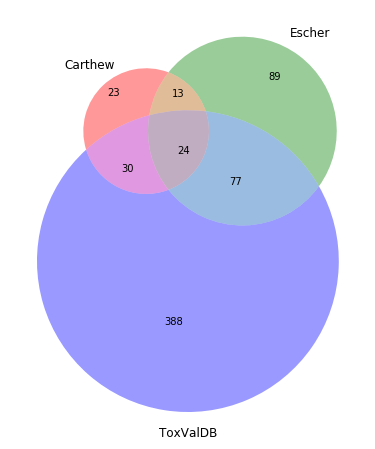

In [167]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
v = venn3([set1, set2, set3], ('Carthew', 'Escher', 'ToxValDB'))
plt.savefig(figures_dir+'venn_overlaps.jpg', dpi = 300)

In [45]:
overlaps_ids = list(set(carthew_df.DTXSID.unique()) & set(escher.DTXSID.unique()) & set(toxval_cramer_ppm.DTXSID.unique()))

Explore overlap betwen ToxVal dataset underpinning the Cramer classes and the Escher dataset 

In [65]:
txval_escher_ids = list(set(escher.DTXSID.unique()) & set(toxval_cramer_ppm.DTXSID.unique()))

In [66]:
temp1 = toxval_cramer_ppm[toxval_cramer_ppm['DTXSID'].isin(txval_escher_ids)]

In [67]:
temp1['Source'] = 'txval'

/home/grace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
temp2 = escher[escher['DTXSID'].isin(txval_escher_ids)]

In [69]:
temp2['Source'] = 'escher'

/home/grace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
escher_txval = pd.merge(temp1, temp2, on = 'DTXSID', how = 'left')

In [79]:
escher_txval.shape

(101, 25)

In [89]:
escher_txval.describe()

,Unnamed: 0,min_toxval_ppm_adj,Cramer,CAS,Year,Cramer_class,General_NOEC_ppm,Systemic_NOEC_ppm,Local_NOEC_ppm,AVERAGE_MASS
count,101.000000,101.000000,101.000000,1.010000e+02,100.000000,101.000000,101.000000,97.000000,44.000000,101.000000
mean,103.643564,546.025934,1.970297,1.116548e+06,1989.380000,1.970297,1696.536010,1771.083515,328.461273,116.164980
std,70.072903,2727.772557,0.994540,7.254209e+06,9.453533,0.994540,9016.410707,9194.699462,1529.798280,72.265993
min,0.000000,0.000383,1.000000,5.000000e+04,1951.000000,1.000000,0.001000,0.001000,0.003000,28.054000
25%,44.000000,0.166667,1.000000,7.901600e+04,1985.000000,1.000000,1.930000,3.390000,0.625000,75.067000
50%,89.000000,4.100000,1.000000,1.069900e+05,1990.000000,1.000000,10.400000,24.950000,4.115000,100.161000
75%,162.000000,50.000000,3.000000,1.161430e+05,1996.000000,3.000000,73.500000,84.600000,33.725000,128.171000
max,251.000000,25000.000000,3.000000,6.835938e+07,2007.000000,3.000000,82000.000000,82000.000000,9995.000000,434.290000


In [100]:
escher_txval[~escher_txval['Systemic_NOEC_ppm'].isnull()]['Systemic_NOEC_ppm']

0         41.70
1        136.90
2         41.80
3          8.33
4         50.00
         ...   
96         4.20
97       300.00
98      2000.00
99     82000.00
100    19938.00
Name: Systemic_NOEC_ppm, Length: 97, dtype: float64

Explore distribution of the 2 datsets by boxplots and computing a ttest

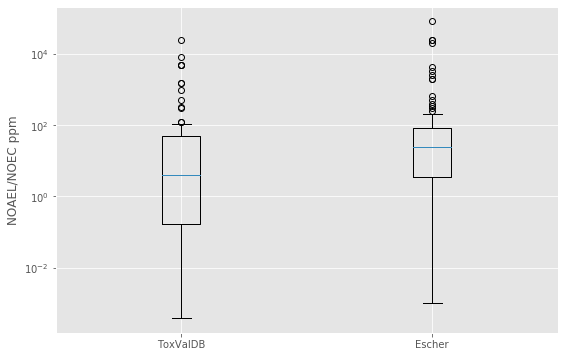

In [164]:
labels = ['ToxValDB', 'Escher']
data = [escher_txval['min_toxval_ppm_adj'], escher_txval[~escher_txval['Systemic_NOEC_ppm'].isnull()]['Systemic_NOEC_ppm']]
f,ax = plt.subplots(figsize = (9,6))
ax.boxplot(data, labels = labels)
plt.yscale('log')
plt.ylabel('NOAEL/NOEC ppm')
plt.savefig(figures_dir+'Escher_ToxVal_boxplot_comparison.jpg', dpi = 300)

In [111]:
from scipy import stats
t2, p2 = stats.ttest_ind(escher_txval['min_toxval_ppm_adj'], escher_txval[~escher_txval['Systemic_NOEC_ppm'].isnull()]['Systemic_NOEC_ppm'], equal_var = False)

In [112]:
t2, p2

(-1.260041349355996, 0.2102701891682602)

Investigating the correlation between the 2 datasets and computing the pearson correlation coefficient and plotting as a scatterplot

In [120]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

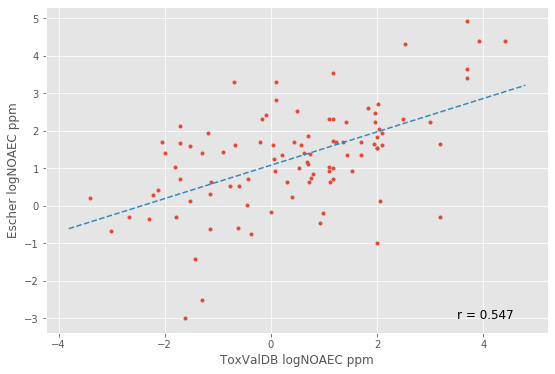

In [166]:
plt.figure(figsize = (9,6))
plt.plot(temp_df['log_min_toxval_ppm_adj'],temp_df['log_Systemic_NOEC_ppm'], linestyle ='none', marker = '.')
#plt.yscale('log')
#plt.xscale('log')
abline(0.4453609894547061,1.078402387661468)
plt.xlabel('ToxValDB logNOAEC ppm')
plt.ylabel('Escher logNOAEC ppm')
plt.text(3.5,-3, 'r = 0.547', fontsize = 12)
plt.savefig(figures_dir+'Escher_ToxVal_comparison.jpg', dpi = 300)

Also attempted a linear regression though not particularly additive to the discussion

In [122]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
regr = linear_model.LinearRegression()

In [131]:
temp_df = escher_txval[~escher_txval['Systemic_NOEC_ppm'].isnull()]

In [141]:
temp_df

temp_df['log_min_toxval_ppm_adj'] = np.log10(temp_df['min_toxval_ppm_adj'])
temp_df['log_Systemic_NOEC_ppm'] = np.log10(temp_df['Systemic_NOEC_ppm'])

/home/grace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/grace/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [142]:
regr.fit(temp_df['log_min_toxval_ppm_adj'].values.reshape(1,-1),temp_df['log_Systemic_NOEC_ppm'].values.reshape(1,-1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
r2_score(temp_df['log_min_toxval_ppm_adj'],temp_df['log_Systemic_NOEC_ppm'])

-0.015836489923399144

Calculating the pearson correlation coefficient - included this in the scatterplot above

In [149]:
plt.plot(np.corrcoef(temp_df['log_min_toxval_ppm_adj'],temp_df['log_Systemic_NOEC_ppm'])

array([[1.        , 0.54781241],
       [0.54781241, 1.        ]])

In [150]:
from scipy.stats import linregress
linregress(temp_df['log_min_toxval_ppm_adj'],temp_df['log_Systemic_NOEC_ppm'])

LinregressResult(slope=0.4453609894547061, intercept=1.078402387661468, rvalue=0.5478124095673371, pvalue=6.348477817141831e-09, stderr=0.06978096747571025)

Investigating overlapping toxicity values between ToxValDB and Carthew

Convert mg/m3 to mg/kg units for comparison to Carthew

In [170]:
d = ((6/24)*(5/7))
bw = 60
V = 20

In [175]:
def noec_conv(s):
    noec_new = s*d*V
    return noec_new

In [176]:
toxval_cramer_mgm3['toxval_new'] = toxval_cramer_mgm3['min_toxval_mgm3_adj'].apply(noec_conv)

In [178]:
txval_carthew_ids = list(set(carthew_df.DTXSID.unique()) & set(toxval_cramer_mgm3.DTXSID.unique()))

In [181]:
temp10 = carthew_df[carthew_df['DTXSID'].isin(txval_carthew_ids)]
temp11 = toxval_cramer_mgm3[toxval_cramer_mgm3['DTXSID'].isin(txval_carthew_ids)]

In [185]:
temp12 = pd.merge(temp10,temp11, on = 'DTXSID', how = 'left')

In [187]:
temp12.head()

,No.,Original_name,Updated_name,Local NOAEC (mg/m3),Systemic NOAEL (mg/kg/day),Reference,Cramer_class,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,SMILES,AVERAGE_MASS,QSAR_READY_SMILES,Unnamed: 0,min_toxval_mgm3_adj,Cramer,toxval_new
0,2,Benzoic acid,Benzoic acid,3.0,0.5,"OECD SIDS, 2001a, IRDC, 1981",1,Benzoic acid,Approved Name,DTXSID6020143,Benzoic acid,OC(=O)C1=CC=CC=C1,122.123,OC(=O)C1=CC=CC=C1,156,41.666667,1.0,148.809524
1,3,"1,4-Butanediol","1,4-Butanediol",79.0,14.0,"Stasenkova (1965), OECD SIDS (2000a)",1,"1,4-Butanediol",Approved Name,DTXSID2024666,"1,4-Butanediol",OCCCCO,90.122,OCCCCO,63,0.675357,1.0,2.411990
2,4,n-Butyl acetate,n-Butyl acetate,847.0,307.0,David et al. (2001),1,n-Butyl acetate,Synonym from Valid Source,DTXSID3021982,Butyl acetate,CCCCOC(C)=O,116.16,CCCCOC(C)=O,85,593.475100,1.0,2119.553930
3,6,2-Butoxyethanol,2-Butoxyethanol,107.0,16.0,Dodd et al. (1983),1,2-Butoxyethanol,Approved Name,DTXSID1024097,2-Butoxyethanol,CCCCOCCO,118.176,CCCCOCCO,30,60.378006,1.0,215.635736
4,7,Diethylene glycol butyl ether,Diethylene glycol butyl ether,34.0,6.4,OECD SIDS (2005a),1,Diethylene glycol butyl ether,Synonym from Valid Source,DTXSID8021519,2-(2-Butoxyethoxy)ethanol,CCCCOCCOCCO,162.229,CCCCOCCOCCO,201,6.630904,1.0,23.681799


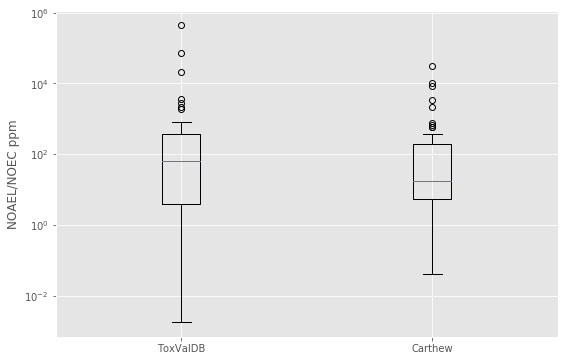

In [189]:
labels = ['ToxValDB', 'Carthew']
data = [temp12['toxval_new'], temp12['Systemic NOAEL (mg/kg/day)']]
f,ax = plt.subplots(figsize = (9,6))
ax.boxplot(data, labels = labels)
plt.yscale('log')
plt.ylabel('NOAEL/NOEC ppm')
plt.savefig(figures_dir+'Carthew_ToxVal_boxplot_comparison.jpg', dpi = 300)

In [190]:
stats.ttest_ind(temp12['toxval_new'], temp12['Systemic NOAEL (mg/kg/day)'])

Ttest_indResult(statistic=1.0960866610530187, pvalue=0.27552487800405473)

In [191]:
temp12.shape

(54, 18)

In [192]:
temp12['logtoxval'] = np.log10(temp12['toxval_new'])
temp12['logCarthew'] = np.log10(temp12['Systemic NOAEL (mg/kg/day)'])

In [193]:
linregress(temp12['logtoxval'],temp12['logCarthew'])

LinregressResult(slope=0.4230764350869608, intercept=0.795383327302313, rvalue=0.5672307787604943, pvalue=7.737764622772916e-06, stderr=0.08518282428148317)

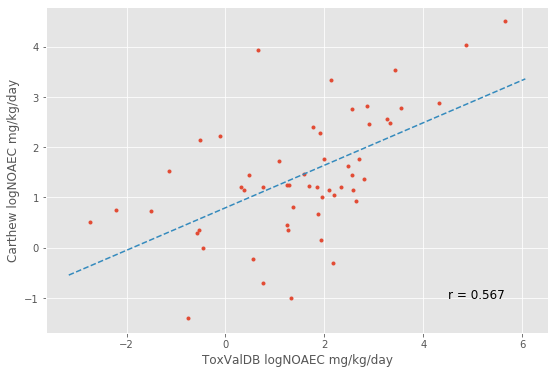

In [196]:
plt.figure(figsize = (9,6))
plt.plot(temp12['logtoxval'],temp12['logCarthew'], linestyle ='none', marker = '.')
#plt.yscale('log')
#plt.xscale('log')
abline(0.4230764350869608,0.795383327302313)
plt.xlabel('ToxValDB logNOAEC mg/kg/day')
plt.ylabel('Carthew logNOAEC mg/kg/day')
plt.text(4.5,-1, 'r = 0.567', fontsize = 12)
plt.savefig(figures_dir+'Carthew_ToxVal_comparison.jpg', dpi = 300)

In [201]:
temp12[['Updated_name','Systemic NOAEL (mg/kg/day)','min_toxval_mgm3_adj', 'Cramer',
       'toxval_new', 'logtoxval', 'logCarthew']].head()

,Updated_name,Systemic NOAEL (mg/kg/day),min_toxval_mgm3_adj,Cramer,toxval_new,logtoxval,logCarthew
0,Benzoic acid,0.5,41.666667,1.0,148.809524,2.172631,-0.301030
1,"1,4-Butanediol",14.0,0.675357,1.0,2.411990,0.382375,1.146128
2,n-Butyl acetate,307.0,593.475100,1.0,2119.553930,3.326244,2.487138
3,2-Butoxyethanol,16.0,60.378006,1.0,215.635736,2.333721,1.204120
4,Diethylene glycol butyl ether,6.4,6.630904,1.0,23.681799,1.374415,0.806180
